<font size="3">KINGDOM OF SAUDI ARABIA<br>
Ministry of Higher Education<br>                                  
Al-Imam Mohammad University<br>
College of Computer & Information Sciences<br><br>
    
 
**Digital Image Processing (CS456), Spring 2023**
<br>**Instructor:
Dr. Fahman Saeed**
<br><br>
**Prepared by:**<br>
- Khloud Alnufaie (440020617)<br>
- Raghad Albosais (440020209)<br>
- Weaam Alghaith (440023306)<br>


**Section: 371**

# 1.Introduction

In light of our accelerating world and the huge amount of data transmitted over the internet specifically in social media, an individual sees dozen or even hundreds of images and types of media every day. Deepfake is a newly emerged issue in our modern days which is media of a person in which their face or body has been digitally altered so that they appear to be someone else, typically used maliciously or to spread false information. In this project, we aim to enhance deepfake videos detection method based some preprocessing for images. Moreever find appropriate feature extractors and classifier for detection.

## 1.1 Problem Statement

One of the strong techniques used in creating misinformation has become known recently as "Deepfake". Deepfakes increasingly threaten the privacy of individuals. Furthermore, Deepfakes can distort our perception of the truth and deceive us. The content of a video can shake the world either because it sparks controversy, or discredits someone. An individual may be accused or suspected of a situation that did not actually occur. For example, modifying a person’s expression to appear sad when in reality, they were happy to satisfy a fake narrative

## 1.2 Problem formulation

- Task (T)	Classify a video to a real or a fake depend on it is manipulated or not.<br>
- Experience (E)	A collection of real and fake faces videos.<br>
- Performance (P)	Classification evaluation metric, which are accuracy, precision, recall and F1 score.

# 2.Proposed method

The implementation for this project will be split into the following sections: dataset preparation; dataset pre-processing; Feature extractor and deepfake classifier model. The overall model architecture that follows the implementation is illustrated in Figure below. We describe and explain our approach to designing our classifier we conduct some pre-processing such as Gradient filters–Sobel and Laplacian filter. Furthermore, we compare the Local Binary Pattern (LBP) feature extractor with VGG16 the Convolutional Neural Network extractor. In the last, we use Support Vector Machine (SVM) as a classifier.

![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/DeepFake_Video_Classification/main/figures/Model.jpg)
<br>

# 3.Celeb-DF (V2) Dataset

We plan to detect fake videos by using Celeb-DF (v2). Celeb-DF (v2) is a large-scale challenging dataset for deepfake forensics. It includes 890 real MP4 videos and 5639 fake MP4 videos, total of 9 GB. The average length of all videos is approximate 13 seconds with the standard frame rate of 30 frame-per-second. The real videos are collected from YouTube with subjects of different ages, ethnic groups, and genders. The fake videos are generated by swapping faces. Dataset available on this link.

Dataset available : https://github.com/yuezunli/celeb-deepfakeforensics 

# 4.Import Resources

In [ ]:
#os :module to provides functions for dealing with folder 
import os
#math :module that provides standard mathematical constants and functions.
import math
#random:module to work with random data generation
import random
#pd :package used for data analysis and manipulation tool
import pandas as pd
#module :to import name for opencv-python  library to solve computer vision problems
import cv2
#tensorflow :library for machine learning and artificial intelligence.
import tensorflow as tf
#train_test_split : splitting dataset into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split
#NumPy :is a Python library used for convert list to arrays
import numpy as np
#argparse :module’s support for command-line interfaces
import argparse
#exists :method in Python is used to check whether the specified path exists or not. 
from os.path import exists
#makedirs :method in Python is used to create a directory recursively.
from os import makedirs
#sns :library for data visualization
import seaborn as sns
#plt :module to import name for opencv-python  library to solve computer vision problems.
import matplotlib.pyplot as plt 
#warnings :module was introduced in PEP 230 as a way to warn programmers 
import warnings
warnings.filterwarnings('ignore')
#SVC (support vector classifier) :used to classification the images
from sklearn.svm import SVC 
#accuracy_score : evaluation metric for the ratio tp + tn/ (tp + fp + tn + fn)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
# skimage.feature provid local_binary_pattern compute the Local Binary Pattern representation
from skimage.feature import local_binary_pattern

In [ ]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
gpu_available = tf.test.is_gpu_available()
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))

In [ ]:
gpu_available

True

In [ ]:
is_cuda_gpu_available

True

In [ ]:
is_cuda_gpu_min_3

True

# 5.Preparing the data

Figure below shows the steps to perform data preparation. Each of these steps is explained in detailed in the following sections (5.1, 5.2 and 5.3.).Note that the preparing excuted in external file under name preparefile.py.

![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/DeepFake_Video_Classification/main/figures/prepearing.jpg)
<br>

## 5.1 Converting MP4 Videos to JPG Images (Frames)

In order to make the dataset suitable to VGG-16, we need t convert the video dataset into image dataset by extracting the video’s frame. In this process, OpenCV’s functions is used to load the video and to read the videos frame by frame. We choose to take only one frame per video because the person is existed in front of the image in most frames. Therefore, we don’t need to save all frames of the video. It is important to note that we choose the frame on second 5 because the first frames sometimes contain the background picture of the channel then the video is started with the person. 

## 5.2 Extract Faces from Frames

The images extracted from the videos consist of a different noise, such as the background view of the person, the table that person sits at and so on. To prevent the VGG-16 from extracting features from these regions, all frames extracted must be cropped so the resulting image only contains the person’s face. The MTCNN module of was used to detect such faces. The MTCNN shows its effectiveness to extract faces among many studies, including the deepfake detection studies. In addition, the model resizes the image after face extraction to the chosen size. The new image is then saved to the destination file path. 

## 5.3 Connect Labels with Images

The dataset provides the label name to the test set named ‘test labels.txt’. The format from these labels is preserved when generating the train set. In which the format contains two columns. The first one is the class name (1 for real and 0 for fake). And the second one is the file name of the image. By doing so, we can use these files when we load the dataset in an effective way. 

# 6.preprocessing

Firstly, the training and testing set is loaded with the filenames and their corresponding labels. The dataset is split into validation–train sets (15% - 85%) based on the typical split value of previous deep fake detection studies in this dataset. The current splits (train, val, and test) contain file names, not actual images. Therefore, a function is defined which can load the images from the file path and perform the necessary pre-processing.

<br><br>
The pre-processing can be divided into two parts: basic pre-processing and face image pre-processing. In the first part, we apply to resize and convert the image to a grayscale image. But before convert to gray scale we remove unwanted noise from the image. In the second part of pre-processing face images, we observe that the face regions of target individuals are smoother in Deepfake videos compared to real videos.Taking this as a clue, we attempt to reduce the influence of smooth regions on detection. Therefore, we consider using a pre-processing where the low-frequency information of the face image is filtered, and the high-frequency information is retained, thereby we choose two high-pass filters to compare them in the detection performance of the detection model. The first filter is the Gradient filter–Sobel and the second is the Laplacian filter. after two of these filters, we used a Gaussian blur filter to tackle noise in images.as shown in Figure below.

![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/DeepFake_Video_Classification/main/figures/preprocessing.jpg)
<br>

Denoising an image refers to the process of reconstruction of a signal from noisy images. Denoising is done to remove unwanted noise from the image to analyze it in a better form. There is a function in OpenCV called cv2.fastNlMeansDenoisingColored. We specify arguments of function as recommended for denoising color images.
<br><br>

Gradient filter–Sobel performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image. which is a convolutional operator, allowing us to compute the image gradients automatically by using OpenCV and the cv2.Sobel function. Sobel uses two kernels: one for detecting horizontal changes in direction and the other for detecting vertical changes in direction:
![Model architecture](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif)
<br>
since it is more resistant to noise. we specify the direction of derivatives to be taken, vertical and horizontal (by the arguments, dy and dx respectively). We also specify the size of the kernel by the argument ksize. Moreover, we specify the desired depth of the destination image as CV_64F. hence it is highly recommended to choose a higher-order output datatype such as cv2.CV_64F.

<br><br>

Laplacian filter is used to compute the second derivatives of an image, measuring the rate at which the change of the first derivative. This determines if a change in adjacent pixel values is from an edge or continuous progression. Laplacian filter kernels usually contain negative values in a cross pattern, centered within the array. The corners are either zero or positive values. The center value can be either negative or positive. We implemented it in OpenCV with the  Laplacian() function. We specify kernel size and desired depth by argument ksize and ddepth. Here we also specify the desired depth of the destination image as CV_64F.

<br><br>
Gaussian blur filter is a widely used effect, typically to reduce image noise and reduce detail. It is a low-pass filter. The Gaussian smoothing (or blur) of an image removes the outlier pixels or the high-frequency components to reduce noise. It is done with the function, cv.GaussianBlur(). In the function, we specify the shape of the kernel. we also specify image boundaries to zero while the kernel is applied on image borders.


## 6.1 Preprocessing and Image Enhancement 

In [ ]:
def get_data(filenames, labels, IMAGE_SIZE):
    data = []
    label = []
    for i, img in enumerate(filenames):
        img_arr = cv2.imread(img, cv2.IMREAD_COLOR)
        # ---- basic preprocessing ---- #
        if img_arr is None:
            print('Wrong path:', img)
        else:
            # 1. reshaping images to preferred size
            resized_arr = cv2.resize(img_arr, (IMAGE_SIZE, IMAGE_SIZE))
            b,g,r = cv2.split(resized_arr)           # get b,g,r
            rgb_img = cv2.merge([r,g,b])     # switch it to rgb

            # Denoising
            dst = cv2.fastNlMeansDenoisingColored(img_arr,None,10,10,7,21)

            b,g,r = cv2.split(dst)           # get b,g,r
            rgb_dst = cv2.merge([r,g,b])     # switch it to rgb
            converting to gray scale
            img = cv2.cvtColor(rgb_dst, cv2.COLOR_BGR2GRAY)
            img2 = np.zeros_like(rgb_dst)
            img2[:,:,0] = img
            img2[:,:,1] = img
            img2[:,:,2] = img
                # ---- laplacian,sobelx,sobelx preprocessing ---- #
            img = cv2.Laplacian(img,cv2.CV_64F)
            img = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
            # remove noise
            img = cv2.GaussianBlur(img,(7,7),0)
            
            data.append(resized_arr)
            label.append(labels[i])

    return data,label

## 6.2 spliting data

In [ ]:
label_image_root_path = './data/Celeb-DF-v2-frame/labels'

if not os.path.isdir(label_image_root_path):
    os.mkdir(label_image_root_path)


train_file = open(os.path.join(label_image_root_path, "train_file.txt"), 'r')
lines = train_file.readlines()
train_file.close()

filenames = []
labels = []

for line in lines:
    filenames.append('./data/Celeb-DF-v2-frame/'+line[2:].rstrip('\n'))
for l in lines:
    labels.append(l[:1])

train_labels = [int(i) for i in labels]

train_filenames, val_filenames, train_labels, val_labels = train_test_split(
    filenames, train_labels, train_size=0.85, random_state=420)


test_file = open(os.path.join(label_image_root_path, "test_file.txt"), 'r')
lines = test_file.readlines()
test_file.close()

test_filenames = []
test_labels = []

for line in lines:
    test_filenames.append('./data/Celeb-DF-v2-frame/'+line[2:].rstrip('\n'))
for l in lines:
    test_labels.append(l[:1])

test_labels = [int(i) for i in test_labels]

In [ ]:
IMAGE_SIZE = 256
train_data, train_labels = get_data(train_filenames,train_labels, IMAGE_SIZE)
val_data, val_labels = get_data(val_filenames, val_labels, IMAGE_SIZE)
test_data, test_labels = get_data(test_filenames, test_labels, IMAGE_SIZE)

x_train = np.array(train_data)
x_val = np.array(val_data)
x_test = np.array(test_data)

y_train = np.array(train_labels).reshape(len(train_labels), 1)
y_val = np.array(val_labels).reshape(len(val_labels), 1)
y_test = np.array(test_labels).reshape(len(test_labels), 1)

Wrong path: ./data/Celeb-DF-v2-frame/YouTube-real/00207.jpg
Wrong path: ./data/Celeb-DF-v2-frame/Celeb-synthesis/id10_id7_0001.jpg
Wrong path: ./data/Celeb-DF-v2-frame/Celeb-synthesis/id10_id11_0001.jpg
Wrong path: ./data/Celeb-DF-v2-frame/Celeb-synthesis/id10_id12_0001.jpg
Wrong path: ./data/Celeb-DF-v2-frame/Celeb-synthesis/id10_id13_0001.jpg


# 7.Exploring the data

In [ ]:
# print their shapes
num_train = len(train_filenames)
num_val = len(val_filenames)
print('num_train: ', num_train)
print('num_val: ', num_val)


print('Training set images shape: ', x_train.shape)
print('Training set labels shape: ', y_train.shape)

print('-----------------------------')
print('Validation set images shape: ', x_val.shape)
print('Validation set labels shape: ', y_val.shape)

print('-----------------------------')
print('Testing set images shape: ', x_test.shape)
print('Testing set labels shape: ', y_test.shape)

num_train:  5109
num_val:  902
Training set images shape:  (5109, 256, 256, 3)
Training set labels shape:  (5109, 1)
-----------------------------
Validation set images shape:  (902, 256, 256, 3)
Validation set labels shape:  (902, 1)
-----------------------------
Testing set images shape:  (513, 256, 256, 3)
Testing set labels shape:  (513, 1)


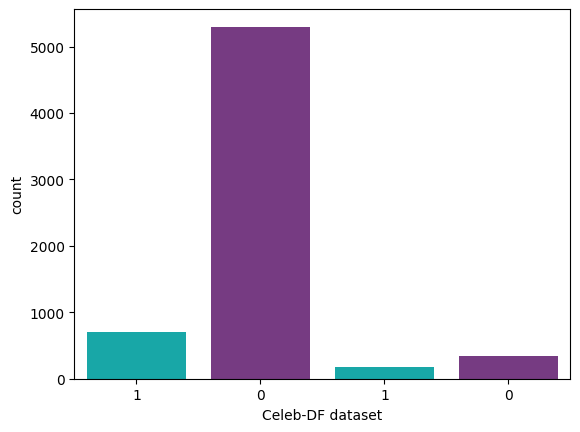

In [ ]:
# Build a dataframe for dataset  
data_filename = filenames + test_filenames
data_label = labels + test_labels       
dataset = pd.DataFrame(data=list(zip(data_filename, data_label)), columns=['imagename', 'class'], index=None)
# check the distribution of target varibale ( the data is balanced or not)
df = pd.DataFrame (data_label, columns = ['target'])
#create bar chart of the number of examples per classes
sns.countplot(x='target',data=df,palette=[[0, 0.75, 0.75],[0.4940, 0.1840, 0.5560] ])
#set the title
plt.xlabel('Celeb-DF dataset')
plt.title('')
#show the chart
plt.show()

In [ ]:
# Print the first 5 entries of the dataset
dataset.head()

,imagename,class
0,/content/drive/MyDrive/small data/Celeb-DF-v2-...,0
1,/content/drive/MyDrive/small data/Celeb-DF-v2-...,0
2,/content/drive/MyDrive/small data/Celeb-DF-v2-...,1
3,/content/drive/MyDrive/small data/Celeb-DF-v2-...,1
4,/content/drive/MyDrive/small data/Celeb-DF-v2-...,0


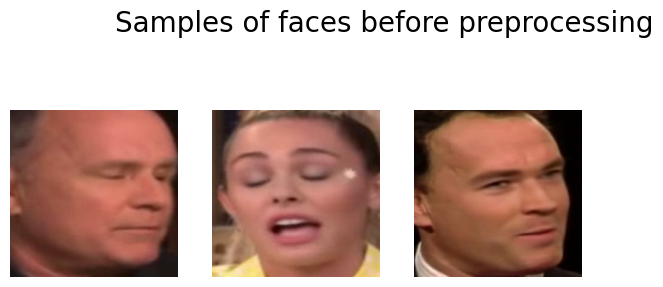

In [ ]:
#resize the image   
fig = plt.figure(figsize=(10, 10))
#loop to print fives images 
i = 0
for i in range(3):
    path = train_filenames[i]
    #show the images in 4×4 display and incerment i
    plt.subplot(4, 4, i + 1)
    #call the load_img() to get image and show it 
    plt.imshow(cv2.imread(path), cmap='gray')
    #the title of display 
    plt.suptitle(("Samples of faces before preprocessing"), fontsize=20)
    #set the axis propreties of graph 
    plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


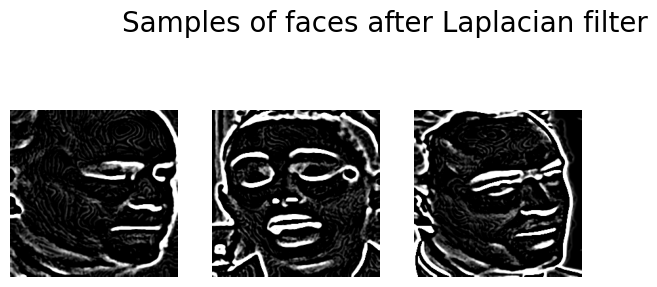

In [ ]:
#resize the image   
fig = plt.figure(figsize=(10, 10))
#loop to print fives images 
i = 0
for i in range(3):
    #show the images in 4×4 display and incerment i
    plt.subplot(4, 4, i + 1)
    #call the load_img() to get image and show it 
    plt.imshow(train_data[i], cmap='gray')
    #the title of display 
    plt.suptitle(("Samples of faces after Laplacian filter"), fontsize=20)
    #set the axis propreties of graph 
    plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


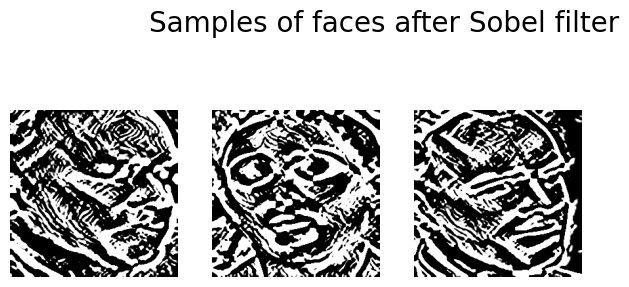

In [ ]:
#resize the image   
fig = plt.figure(figsize=(10, 10))
#loop to print fives images 
i = 0
for i in range(3):
    #show the images in 4×4 display and incerment i
    plt.subplot(4, 4, i + 1)
    #call the load_img() to get image and show it 
    plt.imshow(train_data[i], cmap='gray')
    #the title of display 
    plt.suptitle(("Samples of faces after Sobel filter"), fontsize=20)
    #set the axis propreties of graph 
    plt.axis('off')

# 8.Model development

## 8.1 Features extractor

As shown in below figure we had two feature extractors LBP and VGG16. 

![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/DeepFake_Video_Classification/main/figures/features%20extractor.jpg)
<br>


###  8.1.1 VGG16 feature extractor



we load pre-trained convolutional neural network (CNN) feature extractor (VGG16) then, run the pretrained model on our dataset to extract features from the image, after that the output of the feature extractor is feed as input classifier. The  pre-trained models are applied transfer learning concept, which taking the weight  learned are trained(learned) on previously problem and used it on similar type of new problem without need to train the model again in the new problem. There are different  types of pre-trained CNN models, the most used as feature extraction in deepfake detection task is the VGG16.  It is used widely as a feature extractor, where the last layer (classification layer) is removed to give the classification task to another model. The benefit of pre-trained model is the weight that are learned by another similar task, so we do not need to again train the model (learn weights) in our task, we benefit from the weight that are learned previously, so we are freezing the layers to be non-trainable.


In [ ]:
#loading vgg16 pretrained model
VGG_model=tf.keras.applications.VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3),include_top=False,weights='imagenet')
#we are not not using VGG16 model for training...so we made all layers as non trainable
for layer in VGG_model.layers:
    layer.trainable=False

In [ ]:
# Use the pre-trained VGG16 to extract features from image (training dataset) 
# the VGG16 expects color input images to be rescaled to the size of 224×224 squares
feature_extractor = VGG_model.predict(x_train)

# Change the shape of extracted features to be the required shape of input data to the SVM
# the required shape of SVM is 2D (number of rows, number of columns)
# the number of rows is the number of the image (training data) that the VGG16 extract from its feature
# we can take the number of rows by the first index in extracted feature shape by the VGG16
# and the number of columns is produced after reshaping the extracted features
# so it is determined by -1 (because we don’t know the new produced dimensions after reshaping)
X_train_features = feature_extractor.reshape(feature_extractor.shape[0], -1)

# Save the output (extracted features) to use it as input to the SVM classifier
# This is our X input to SVM
X_for_SVM = X_train_features

160/160 [==============================] - 5s 29ms/step


In [ ]:
# The shape represent (number of image= rows, number of extracted feature for each image=coloumn)
print(X_for_SVM.shape)

(5109, 32768)


In [ ]:
# Send test data through same feature extractor process
# to be used in SVM predction 
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

17/17 [==============================] - 1s 39ms/step



###  8.1.2 LBP feature extrctor 



Since the image can be roughly divided into textured and smooth regions. The high texture area of the image contains rich feature information, and the feature information can guide us through the detection tasks. Therefore we used LBP which is considered as one of the best feature extraction techniques when it comes to enhancing textures. It will divide the image into some areas and count the density of the gradient in every area by comparing a pixel with its surrounding neighbors and generating a new pixel value according to those neighbors. The benefit of LBP implementation is that we can capture extremely fine-grained details in the image. We used the create_dataset() function is to iterate through an array of images in which every single of those will be processed using the local_binary_pattern() function that we have already imported from Scikit-Image. we specify function parameters that denote the number of sampling points that will be thresholded by the center pixel to 8, and the parameter determines the sampling point radius to 1. After that, the extracted features will feed to the classifier.

In [ ]:
# method to create data set
def create_dataset(x, y, descriptor):
    
    # list to store extracted features of an image
    features = []
    
    # list to store class label
    labels = y   
    
    radius = 3
    
    # number of neighbors to consider for LBP
    n_points = 8 * radius 
    
    # sampling type for LBP
    METHOD = 'uniform'

    # loop through the images in the set
    for img in x:

      # Extracting features of an image using LBP
      lbp = local_binary_pattern(img, n_points, radius, METHOD)
                    
      # Converting into 1-D array
      fd=lbp.flatten()

      # appending exracted features to the list
      features.append(fd)
    features = np.array(features)
    return features,labels

In [ ]:
# LBP 
# Training and testing datasets
X_for_SVM,y_train = create_dataset(x_train,y_train, 'LBP') 
X_test_features,y_test = create_dataset(x_test,y_test, 'LBP')

In [ ]:
# The shape represent (number of image= rows, number of extracted feature for each image=coloumn)
print(X_for_SVM.shape)

(5109, 65536)


## 8.2 Classification using SVM

Figure below shows the model architecture, we use SVM which is a supervised machine learning classifier. It is the best ML model used to detect deep fakes. Owing to its robustness, it’s generally implemented for solving classification tasks. In the SVM, the data points are first represented in an n-dimensional space. Then by use statistical approaches to find the best line that separates the various classes present in the data.

![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/DeepFake_Video_Classification/main/figures/classifier.jpg)
<br>

In [ ]:
# Build the SVM with default parameters, and set the random state to keep the same results in each run
SVM_model = SVC(random_state = 42)

# Train the SVM  on training data (extracted features) with its labels
SVM_model.fit(X_for_SVM, y_train)


SVC(random_state=42)

# 9.Evaluation

In [ ]:
###### Make predction on train dataset ######
y_train_pred = SVM_model.predict(X_for_SVM)


###### Make predction on test dataset ######
y_test_pred = SVM_model.predict(X_test_features)


In [ ]:
# define list for evaluate training and testing
# calculate each evaluation matrics in training and testing prediction
# traning: to see the overfitting and underfitting
# testing: to see how well our model does
model_train= {'model': ['model_1'],
        'Pre_processing': ['Laplician'],
        'Feature extractor': ['VGG16'],
        'Accuracy': [accuracy_score(y_train, y_train_pred)],
        'Precision': [precision_score(y_train, y_train_pred)],
        'Recall': [recall_score(y_train, y_train_pred)],
        'F1 score': [f1_score(y_train, y_train_pred)]}

model_test= {'model': ['model_1'],
        'Pre_processing': ['Laplician'],
        'Feature extractor': ['VGG16'],
        'Accuracy': [accuracy_score(y_test, y_test_pred)],
        'Precision': [precision_score(y_test, y_test_pred)],
        'Recall': [recall_score(y_test, y_test_pred)],
        'F1 score': [f1_score(y_test, y_test_pred)]}

In [ ]:
# add next result of models for train
model_train["model"].append("model_5")
model_train["Pre_processing"].append("Wthout")
model_train["Feature extractor"].append("VGG16")
model_train["Accuracy"].append(accuracy_score(y_train, y_train_pred))
model_train["Precision"].append(precision_score(y_train, y_train_pred))
model_train["Recall"].append(recall_score(y_train, y_train_pred))
model_train["F1 score"].append(f1_score(y_train, y_train_pred))


# add next result of models for test
model_test["model"].append("model_5")
model_test["Pre_processing"].append("Without")
model_test["Feature extractor"].append("VGG16")
model_test["Accuracy"].append(accuracy_score(y_test, y_test_pred))
model_test["Precision"].append(precision_score(y_test, y_test_pred))
model_test["Recall"].append(recall_score(y_test, y_test_pred))
model_test["F1 score"].append(f1_score(y_test, y_test_pred))

In [ ]:
# Convert the dictionary into DataFrame
df_train = pd.DataFrame(model_train)
df_test = pd.DataFrame(model_test) 

In [ ]:
# Summary result for Training 
df_train

,model,Pre_processing,Feature extractor,Accuracy,Precision,Recall,F1 score
0,model_1,Laplician,VGG16,0.904874,1.0,0.200658,0.334247
1,model_2,Sobel,VGG16,0.921903,1.0,0.343750,0.511628
2,model_3,Laplacian,LBP,0.928949,1.0,0.402961,0.574443
3,model_4,Sobel,LBP,0.921120,1.0,0.337171,0.504305
4,model_5,Wthout,VGG16,0.926796,1.0,0.384868,0.555819


In [ ]:
# Summary result for Testing
df_test 

,model,Pre_processing,Feature extractor,Accuracy,Precision,Recall,F1 score
0,model_1,Laplician,VGG16,0.690058,1.0,0.101695,0.184615
1,model_2,Sobel,VGG16,0.686160,1.0,0.090395,0.165803
2,model_3,Laplacian,LBP,0.654971,0.0,0.000000,0.000000
3,model_4,Sobel,LBP,0.654971,0.0,0.000000,0.000000
4,model_5,Without,VGG16,0.713450,1.0,0.169492,0.289855


# 10.Discussion and Analyze the results

## 10.1 Analyze the results

After exploring result as data frame in above cells (both training and testing separately) in different metrics (i.e. accuracy, precision, recall and F1). In  this section, we will illustrate result of our model in bar graph below (a) represent accuracy of each model in Training and Testing dataset (b) represent Precision of each model in Training and Testing dataset (c) represent recall of each model in Training and Testing dataset (d) represent F1score of each model in Training and Testing dataset.

![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/DeepFake_Video_Classification/main/figures/chart%20graph.png)
<br>

## 10.2 Discussion

 Our project applied two preprocessing filters and two feature extractors with an SVM classifier for detecting deep fake videos. The model was evaluated on the  Celeb-DF dataset. The result of the model with preprocessing show convergent performance in term of accuracy, precision, recall, and F1 score. But the Laplacian filter is better by 1% than the Gradient–Sobel filter in terms of accuracy. For Feature extractors, the VGG16 shows a better result by 4% than the LBP extractor. In consequence, we do an experiment for VGG16 without preprocessing filters in order to better results. What we observe is that the VGG16 which is a convolutional neural network extractor show the best result 72% in term of accuracy. Nevertheless is still we need to best classifier for detecting DeepFake videos. The state-of-the-art for detecting Deepfake videos by using the VGG16 model with its classification layer has a good result. Because the current studies show that deep neural networks made a remarkable result in terms of detecting deep fake videos in social media versus DeepFake generators by deep neural networks. To further improve we add section 11 for classification by using Deep Neural Network which is end to end VGG16 model.<br>
Important note, although we did some preprocessing steps and tried to improve the performance, our model has an imbalance data problem and due to the limitation of resources, we don't solve the imbalance issue. But we observe the effect of preprocessing and feature extractors in detecting Deepfake videos.

# 11.Classification use Deep Neural Network 

In [ ]:
#idintify input shape for model 
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
#Load model for classifiy image task
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
# Make model non-trainable. to use the pre-trained weights in our task
base_model.trainable = True
#make model sequential model layers that created will added to it
model = tf.keras.models.Sequential()
# add base model VGG-16
model.add(base_model)
# add pooling layer
model.add(tf.keras.layers.GlobalAveragePooling2D())
#add dense layer for get result of classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#compile model to be ready to be executed
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])
# print model summary for parameter number and shapes
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#stopping the training once the model's performance stops improving on the validation Dataset.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')
#identify number of epochs and batch size
# number of passes of the entire training dataset the model has completed.
EPOCHS = 20
# number of samples processed before the model is updated. 
BATCH_SIZE = 100
# Train the model on training data
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (x_val, y_val), verbose = 1)


Epoch 1/20
52/52 [==============================] - 39s 389ms/step - loss: 0.4059 - accuracy: 0.8698 - val_loss: 0.3478 - val_accuracy: 0.8825
Epoch 2/20
52/52 [==============================] - 18s 349ms/step - loss: 0.3078 - accuracy: 0.8923 - val_loss: 0.2973 - val_accuracy: 0.8958
Epoch 3/20
52/52 [==============================] - 18s 348ms/step - loss: 0.2497 - accuracy: 0.9113 - val_loss: 0.2544 - val_accuracy: 0.9135
Epoch 4/20
52/52 [==============================] - 18s 350ms/step - loss: 0.1952 - accuracy: 0.9305 - val_loss: 0.2453 - val_accuracy: 0.9146
Epoch 5/20
52/52 [==============================] - 18s 351ms/step - loss: 0.1361 - accuracy: 0.9544 - val_loss: 0.2074 - val_accuracy: 0.9224
Epoch 6/20
52/52 [==============================] - 18s 351ms/step - loss: 0.1054 - accuracy: 0.9630 - val_loss: 0.2131 - val_accuracy: 0.9235
Epoch 7/20
52/52 [==============================] - 18s 353ms/step - loss: 0.0772 - accuracy: 0.9742 - val_loss: 0.1450 - val_accuracy: 0.9490

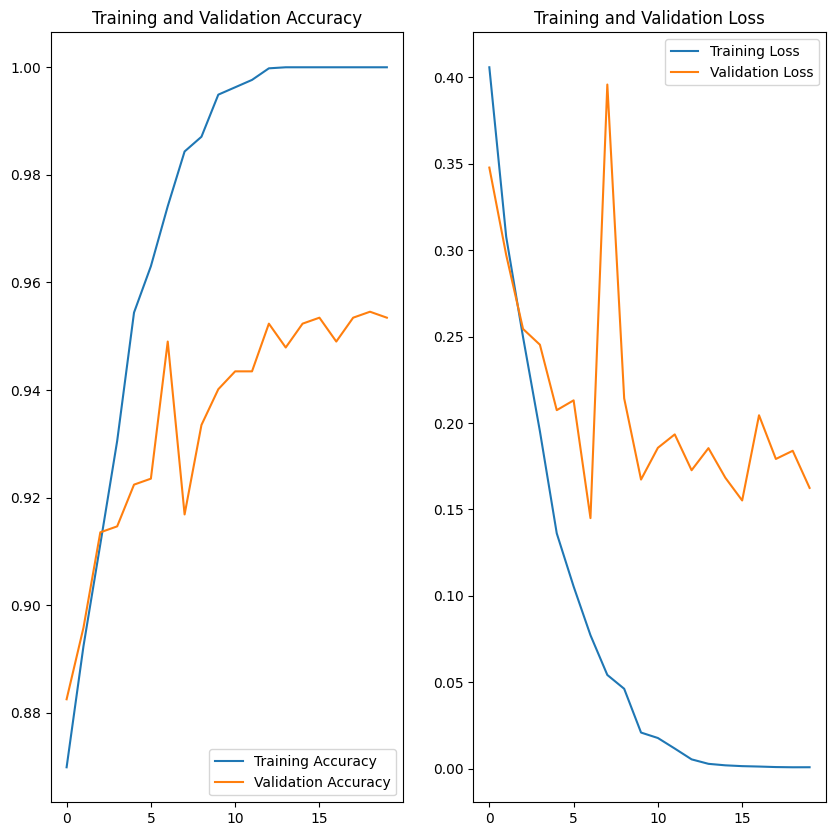

In [ ]:
# summarize history for accuracy and loss
#get train accuracy
acc = history.history['accuracy']
#get validation accuracy
val_acc = history.history['val_accuracy']
#get train loss
loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']
#get range from 0 to epochs
epochs_range = range(EPOCHS)
#set size of figure
plt.figure(figsize=(10, 10))
# set size of plot for accracy
plt.subplot(1, 2, 1)
# draw diagram for Training Accuracy
plt.plot(epochs_range, acc, label='Training Accuracy')
# draw diagram for Validation Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#responsible for drawing legends associated with axes
plt.legend(loc='lower right')
#set title of chart
plt.title('Training and Validation Accuracy')
# set size of plot for loss
plt.subplot(1, 2, 2)
# draw diagram for Training loss
plt.plot(epochs_range, loss, label='Training Loss')
# draw diagram for Validation loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
#responsible for drawing legends associated with axes
plt.legend(loc='upper right')
#set title of chart
plt.title('Training and Validation Loss')
#display
plt.show()

In [ ]:
#evaluate model accuracy and loss at test dataset
test_loss, test_score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

6/6 [==============================] - 1s 169ms/step - loss: 0.5058 - accuracy: 0.8967
Loss on test set:  0.5057516098022461
Accuracy on test set:  0.8966861367225647


In [ ]:
#helper function to determin result of classification in binary
def determin(preds):
    le_pred =[]   
    for i in preds:
        if i < 0.5:
            le_pred.append(0)
        else:
            le_pred.append(1)

    return le_pred

In [ ]:
# Get predictions
preds = model.predict(x_test, batch_size=BATCH_SIZE)
y_train_pred = model.predict(x_train, batch_size=BATCH_SIZE)
#Return a copy of the array collapsed into one dimension.
y_test_predd = preds.flatten()
y_train_pred = y_train_pred.flatten()
#Convert prediction to binary
y_test_predd = determin(y_test_predd)
y_train_pred = determin(y_train_pred)

# Original labels
print(y_test.shape)
# predicted labels
print(preds.shape)

52/52 [==============================] - 5s 93ms/step
(513, 1)
(513, 1)


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

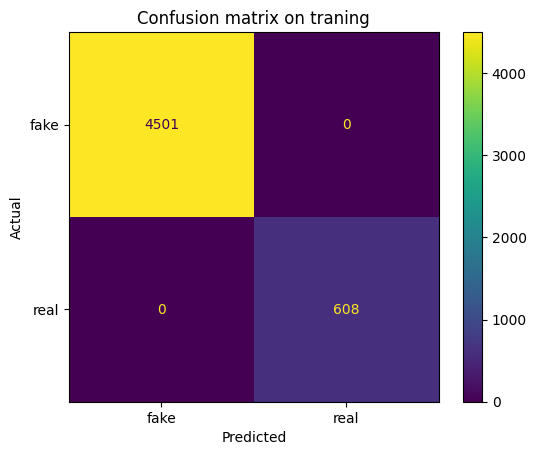

In [ ]:
# Get the confusion matrix
#confusion_matrix,ConfusionMatrixDisplay : to dealing and show confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Build the confusion matrix for label prediction in traning dataset
cm = confusion_matrix(y_train, y_train_pred)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on traning")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 0: fake, 1: real
# positive: fake, negative: real

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

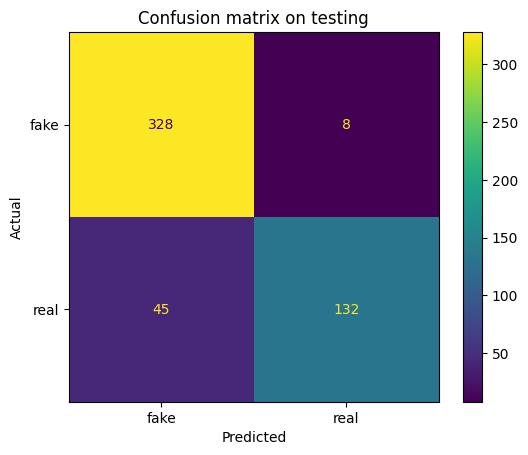

In [ ]:
# Build the confusion matrix for label prediction in testing dataset
cm = confusion_matrix(y_test, y_test_predd)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on testing")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
# 0: fake, 1: real
# positive: fake, negative: real

In [ ]:
print('The training accuracy: ' + str(accuracy_score(y_train, y_train_pred)))
print('The testing accuracy: '+ str(accuracy_score(y_test, y_test_predd)))

The training accuracy: 1.0
The testing accuracy: 0.8966861598440545


# 12.Challanges



*   Long run time. 
*   Improve the performance of the classifier. 
*   Imbalanced dataset.
*   Understand the Dataset to choose appropriate preprocessing filters and Sorting feature extractors.



# 13.Tools and technologies


In our project, we use a lot of tools and technologies, we illustrate it in Figure below.<br><br>
![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/DeepFake_Video_Classification/main/figures/Tools.png)
<br> 


# 14.Conclusion

In conclusion, since we satisfied the required plan, we have achieved what we were aiming to do. We applied an approach for detecting deep fake videos using the combination of the SVM classifier with the preprocessing filters and feature extractors. The approach was evaluated on the Celeb-DF dataset and achieved 72% performance. Then with classification using an end-to-end neural network, we get better results where is 89.6% in terms of accuracy. The results of the evaluation demonstrate that the proposed approach is highly effective in detecting deep fake videos. The preprocessing filters show how the high-frequency information is retained and the low-frequency information is filtered. The Feature extractors present that the high texture area of the image contains rich feature information, and the feature information can guide us through our detection tasks.

# 15.References



1.  Z. Akhtar, “Deepfakes Generation and Detection: A Short Survey,” Journal of Imaging, vol. 9, no. 1, p. 18, Jan. 2023, doi: https://doi.org/10.3390/jimaging9010018.
2. Z. Xia, T. Qiao, M. Xu, X. Wu, L. Han, and Y. Chen, “Deepfake Video Detection Based on MesoNet with Preprocessing Module,” Symmetry, vol. 14, no. 5, p. 939, May 2022, doi: https://doi.org/10.3390/sym14050939.
3. R. Lini, “Different Filters for Image processing,” Medium, Oct. 17, 2021. https://medium.com/@rajilini/different-filters-for-image-processing-698e72924101 (accessed Jun. 04, 2023).
4. M. Ardi, “Local Binary Pattern Features for Texture Classification,” Medium, Jan. 11, 2023. https://becominghuman.ai/local-binary-pattern-features-for-texture-classification-d0dfd86ebf29 (accessed Jun. 04, 2023).
5. “OpenCV 3  Image Noise Reduction : Non-local Means Denoising Algorothm - 2018,” Bogotobogo.com, 2018. https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Non-local_Means_Denoising_Algorithm_Noise_Reduction.php
6. “OpenCV: Smoothing Images,” docs.opencv.org. https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
7. Fast, optimized ’for’ pixel loops with OpenCV, and P.-P. says, “Local Binary Patterns with Python & OpenCV,” PyImageSearch, Dec. 07, 2015. https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
8. P. Yadav, “Deepfakes Detection,” GitHub, Jul. 03, 2022. https://github.com/pradyyadav/Deepfakes-detection/tree/main (accessed Jun. 04, 2023).

